In [1]:
#seasonal_profits
#top_10_genre_counts
#budget_counts

In [2]:
#release_date_analysis_v1
#budget_analysis
#genre_roi
#movies_df2
#movie_genre_analysis

In [3]:
#Import the relevant libraries to explore the datasets

In [4]:
#zippedData/im.db K

#zippedData/tmdb.movies.csv has gernes but need to translate from genre id to actual name 
#usable[genre_ids, original_title]

#zippedData/tn.movie_budgets.csv K only one that has budgets
#useable [movie, production_budget, domestic_gross


In [5]:
type('zippedData/bom.movie_gross.csv.gz')

str

In [6]:
#import all the libraries we need
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3 
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from scipy.interpolate import make_interp_spline

%matplotlib inline



In [7]:
!ls

Data_Exploration.ipynb            Phase 2 project description.ipynb
Data_Exploration.ipynb copy       student.ipynb
Data_Exploration2.ipynb           your_database.db


In [8]:
!pwd

/Users/andrewreusche/Documents/Flatiron2/Phase2/lessons/dsc-phase-2-project-v3/notebooks


In [9]:
#preview the movie genre dataset
movie_genre = pd.read_csv('../zippedData/tmdb.movies.csv', index_col= 0)
movie_genre.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
movie_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [11]:
#preview the movie budget dataset
movie_budget = pd.read_csv('../zippedData/tn.movie_budgets.csv', index_col= 0)
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [13]:
conn = sqlite3.connect('../zippedData/im.db')
cur = conn.cursor()

In [14]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [15]:
conn = sqlite3.connect('../zippedData/im.db')

query= """
        SELECT mov.genres, mov.primary_title
        FROM movie_basics AS mov;
        """

df = pd.read_sql(query, conn)

# Step 2: Split the movie_genre column by commas and expand it into individual rows
df['genres'] = df['genres'].str.split(',')  # Split by comma into lists
df = df.explode('genres', ignore_index=True)  # Expand the lists into separate rows

df.head(10)

,genres,primary_title
0,Action,Sunghursh
1,Crime,Sunghursh
2,Drama,Sunghursh
3,Biography,One Day Before the Rainy Season
4,Drama,One Day Before the Rainy Season
5,Drama,The Other Side of the Wind
6,Comedy,Sabse Bada Sukh
7,Drama,Sabse Bada Sukh
8,Comedy,The Wandering Soap Opera
9,Drama,The Wandering Soap Opera


In [16]:
movie_genres= df
len(movie_genres)

234958

In [17]:
movie_genres.rename(columns={'primary_title': 'movie'}, inplace=True)


In [18]:
movie_genres[movie_genres['movie']=='Avatar']

,genres,movie
29143,Horror,Avatar


In [19]:
#preview the movie budget dataset
movie_budget = pd.read_csv('../zippedData/tn.movie_budgets.csv', index_col= 0)
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
len(movie_budget)

5782

In [21]:
movies_df =movie_budget.merge(movie_genres, how='outer', on=['movie'])


movies_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Fantasy
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Action


In [22]:
len(movies_df)

238759

In [23]:
movies_df[['movie','genres']]

,movie,genres
0,Avatar,Horror
1,Pirates of the Caribbean: On Stranger Tides,Action
2,Pirates of the Caribbean: On Stranger Tides,Adventure
3,Pirates of the Caribbean: On Stranger Tides,Fantasy
4,Dark Phoenix,Action
...,...,...
238754,Kuambil Lagi Hatiku,Drama
238755,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
238756,Dankyavar Danka,Comedy
238757,6 Gunn,None


In [24]:
movies_df.drop_duplicates(keep='first', inplace=True)
len(movies_df)

232099

In [25]:
movies_df[movies_df['movie']=='Avatar']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror


In [26]:
movies_df.drop(columns=['worldwide_gross'], inplace=True)


In [27]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",Fantasy
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",Action


In [28]:
movies_df.dropna(subset=['production_budget', 'domestic_gross'], inplace=True)


In [29]:
x=['production_budget','domestic_gross']

for col in x:
    movies_df[col] = movies_df[col].replace({'\$': '', ',': ''}, regex=True).astype(int)

movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action


In [30]:
movies_df['ROI']=movies_df['domestic_gross']-movies_df['production_budget']

In [31]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650


In [32]:
movies_df['ROI'].describe()

count    1.020900e+04
mean     9.754699e+06
std      5.318560e+07
min     -3.072376e+08
25%     -1.041056e+07
50%     -6.977400e+05
75%      1.774096e+07
max      6.306622e+08
Name: ROI, dtype: float64

In [33]:
budget_analysis=movies_df[['movie','production_budget','ROI']]
budget_analysis.head()

,movie,production_budget,ROI
0,Avatar,425000000,335507625
1,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125
2,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125
3,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125
4,Dark Phoenix,350000000,-307237650


In [34]:
len(budget_analysis)

10209

In [35]:
budget_analysis = budget_analysis.drop_duplicates(subset=['movie'], keep='first')
len(budget_analysis)


5698

In [36]:
budget_analysis.head()

,movie,production_budget,ROI
0,Avatar,425000000,335507625
1,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125
4,Dark Phoenix,350000000,-307237650
7,Avengers: Age of Ultron,330600000,128405868
10,Star Wars Ep. VIII: The Last Jedi,317000000,303181382


In [37]:
movie_genre_analysis=movies_df[['movie','genres','ROI']]
movie_genre_analysis.head()

,movie,genres,ROI
0,Avatar,Horror,335507625
1,Pirates of the Caribbean: On Stranger Tides,Action,-169536125
2,Pirates of the Caribbean: On Stranger Tides,Adventure,-169536125
3,Pirates of the Caribbean: On Stranger Tides,Fantasy,-169536125
4,Dark Phoenix,Action,-307237650


In [38]:
len(movie_genre_analysis)

10209

In [39]:
movie_genre_analysis.groupby('genres')['ROI'].describe()


,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,653.0,5.354485e+06,7.276229e+07,-307237650.0,-22431493.00,-4000000.0,17314930.00,500059566.0
Adventure,480.0,1.501529e+07,9.206254e+07,-307237650.0,-24943345.00,-2000000.0,31331758.25,500059566.0
Animation,141.0,3.206159e+07,8.843971e+07,-128607242.0,-16204345.00,3528619.0,52282182.00,408581744.0
Biography,235.0,8.309352e+06,3.916829e+07,-74979242.0,-10863950.00,-800000.0,17835934.00,292126372.0
Comedy,776.0,1.399452e+07,4.940364e+07,-114911680.0,-6964821.50,-200000.0,23039317.50,314508916.0
Crime,373.0,3.283603e+06,3.363286e+07,-90000000.0,-11991839.00,-2669000.0,10418723.00,181461711.0
Documentary,362.0,4.804843e+06,3.822121e+07,-106135493.0,-8158782.50,-975000.0,8268944.00,262563408.0
Drama,1307.0,6.380701e+06,4.053748e+07,-136637525.0,-9934968.50,-993130.0,12682164.00,356057266.0
Family,188.0,1.681673e+07,7.151554e+07,-128607242.0,-10017734.75,-139660.5,27623799.00,459363944.0


In [40]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650


In [41]:
movies_df['profict_multiplier']= movies_df['domestic_gross']/movies_df['production_budget']
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI,profict_multiplier
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625,1.789430
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125,0.587101
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125,0.587101
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125,0.587101
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650,0.122178


In [42]:
def profitability(num):
    if 0 < num < 1:
        x='Investment Loss'
    elif 1 < num < 2:
        x='Profit Made'
    else:
        x='Investment Doubled'
    return x


In [43]:
movies_df['profitability']= movies_df['profict_multiplier'].apply(lambda x: profitability(x))
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,ROI,profict_multiplier,profitability
0,"Dec 18, 2009",Avatar,425000000,760507625,Horror,335507625,1.789430,Profit Made
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Action,-169536125,0.587101,Investment Loss
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Adventure,-169536125,0.587101,Investment Loss
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,Fantasy,-169536125,0.587101,Investment Loss
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,-307237650,0.122178,Investment Loss


In [44]:
release_date_analysis=movies_df[['release_date','movie','ROI', 'profitability']]
release_date_analysis.head()

,release_date,movie,ROI,profitability
0,"Dec 18, 2009",Avatar,335507625,Profit Made
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss


In [45]:
movie_genre_analysis=movies_df[['movie','genres','ROI','profitability']]
movie_genre_analysis.head()

,movie,genres,ROI,profitability
0,Avatar,Horror,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,Action,-169536125,Investment Loss
2,Pirates of the Caribbean: On Stranger Tides,Adventure,-169536125,Investment Loss
3,Pirates of the Caribbean: On Stranger Tides,Fantasy,-169536125,Investment Loss
4,Dark Phoenix,Action,-307237650,Investment Loss


In [46]:
movie_genre_analysis=movie_genre_analysis.drop_duplicates(keep='first')
movie_genre_analysis.head()

,movie,genres,ROI,profitability
0,Avatar,Horror,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,Action,-169536125,Investment Loss
2,Pirates of the Caribbean: On Stranger Tides,Adventure,-169536125,Investment Loss
3,Pirates of the Caribbean: On Stranger Tides,Fantasy,-169536125,Investment Loss
4,Dark Phoenix,Action,-307237650,Investment Loss


In [47]:
len(release_date_analysis)

10209

In [48]:
release_date_analysis_v1=release_date_analysis.drop_duplicates(keep='first')
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability
0,"Dec 18, 2009",Avatar,335507625,Profit Made
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made


In [49]:
release_date_analysis_v1 = release_date_analysis_v1.drop_duplicates(subset=['movie'], keep='first')
len(release_date_analysis_v1)

5698

In [50]:
len(release_date_analysis_v1)

5698

In [51]:
budget_analysis=movies_df[['movie','production_budget','ROI','profitability']]
budget_analysis.head()

,movie,production_budget,ROI,profitability
0,Avatar,425000000,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125,Investment Loss
2,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125,Investment Loss
3,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125,Investment Loss
4,Dark Phoenix,350000000,-307237650,Investment Loss


In [52]:
budget_analysis = budget_analysis.drop_duplicates(subset=['movie'], keep='first')
len(budget_analysis)

5698

## Datasets shown here

In [53]:
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability
0,"Dec 18, 2009",Avatar,335507625,Profit Made
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made


In [54]:
movie_genre_analysis.head()

,movie,genres,ROI,profitability
0,Avatar,Horror,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,Action,-169536125,Investment Loss
2,Pirates of the Caribbean: On Stranger Tides,Adventure,-169536125,Investment Loss
3,Pirates of the Caribbean: On Stranger Tides,Fantasy,-169536125,Investment Loss
4,Dark Phoenix,Action,-307237650,Investment Loss


In [55]:
budget_analysis.head()

,movie,production_budget,ROI,profitability
0,Avatar,425000000,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125,Investment Loss
4,Dark Phoenix,350000000,-307237650,Investment Loss
7,Avengers: Age of Ultron,330600000,128405868,Profit Made
10,Star Wars Ep. VIII: The Last Jedi,317000000,303181382,Profit Made


## workd on finalizing release date data

In [56]:
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability
0,"Dec 18, 2009",Avatar,335507625,Profit Made
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made


In [57]:
release_date_analysis_v1['Release_Month']= release_date_analysis_v1['release_date'].str[:3]
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability,Release_Month
0,"Dec 18, 2009",Avatar,335507625,Profit Made,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss,May
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss,Jun
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made,May
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made,Dec


In [58]:
def month_to_season(month):
    season_dict= { 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
                  'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
                  'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall',
                  'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter'}
    return season_dict.get(month)
    

In [59]:
release_date_analysis_v1['Season']= release_date_analysis_v1['Release_Month'].apply( lambda x : month_to_season(x))
release_date_analysis_v1.head()

,release_date,movie,ROI,profitability,Release_Month,Season
0,"Dec 18, 2009",Avatar,335507625,Profit Made,Dec,Winter
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125,Investment Loss,May,Spring
4,"Jun 7, 2019",Dark Phoenix,-307237650,Investment Loss,Jun,Summer
7,"May 1, 2015",Avengers: Age of Ultron,128405868,Profit Made,May,Spring
10,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,303181382,Profit Made,Dec,Winter


In [60]:
Seasonal_ROI = release_date_analysis_v1[['Season','ROI','profitability']]
Seasonal_ROI.head()

,Season,ROI,profitability
0,Winter,335507625,Profit Made
1,Spring,-169536125,Investment Loss
4,Summer,-307237650,Investment Loss
7,Spring,128405868,Profit Made
10,Winter,303181382,Profit Made


In [61]:
Seasonal_ROI.groupby('Season')['ROI'].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,1528.0,6.371051e+06,3.980061e+07,-120702809.0,-10491511.5,-777875.0,13889893.0,294668047.0
Spring,1311.0,9.815042e+06,5.130375e+07,-201941321.0,-8230492.0,-500000.0,14304041.5,449998007.0
Summer,1390.0,1.552339e+07,5.594630e+07,-307237650.0,-7449799.0,756917.0,24796430.0,437270625.0
Winter,1469.0,8.920551e+06,5.109042e+07,-150000000.0,-9989882.0,-700000.0,16726995.0,630662225.0


## work on finalizing genre data

In [62]:
movie_genre_analysis.head()

,movie,genres,ROI,profitability
0,Avatar,Horror,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,Action,-169536125,Investment Loss
2,Pirates of the Caribbean: On Stranger Tides,Adventure,-169536125,Investment Loss
3,Pirates of the Caribbean: On Stranger Tides,Fantasy,-169536125,Investment Loss
4,Dark Phoenix,Action,-307237650,Investment Loss


In [63]:
len(movie_genre_analysis)

10209

In [64]:
movie_genre_analysis[movie_genre_analysis['genres'].isna()]

,movie,genres,ROI,profitability
10,Star Wars Ep. VIII: The Last Jedi,NaN,303181382,Profit Made
11,Star Wars Ep. VII: The Force Awakens,NaN,630662225,Investment Doubled
15,Pirates of the Caribbean: At Worldâs End,NaN,9420425,Profit Made
36,Spider-Man 3,NaN,78530303,Profit Made
46,Harry Potter and the Half-Blood Prince,NaN,52089278,Profit Made
...,...,...,...,...
11263,Cavite,NaN,63071,Investment Doubled
11264,The Mongol King,NaN,-6100,Investment Loss
11268,Following,NaN,42482,Investment Doubled
11269,Return to the Land of Wonders,NaN,-3662,Investment Loss


In [65]:
movie_genre_analysis.dropna(subset=['genres'], inplace=True)


In [66]:
len(movie_genre_analysis)

6739

In [67]:
movie_genre_analysis.head()

,movie,genres,ROI,profitability
0,Avatar,Horror,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,Action,-169536125,Investment Loss
2,Pirates of the Caribbean: On Stranger Tides,Adventure,-169536125,Investment Loss
3,Pirates of the Caribbean: On Stranger Tides,Fantasy,-169536125,Investment Loss
4,Dark Phoenix,Action,-307237650,Investment Loss


In [68]:
Genre_ROI=movie_genre_analysis[['genres','ROI','profitability']]
Genre_ROI.head()

,genres,ROI,profitability
0,Horror,335507625,Profit Made
1,Action,-169536125,Investment Loss
2,Adventure,-169536125,Investment Loss
3,Fantasy,-169536125,Investment Loss
4,Action,-307237650,Investment Loss


## work on finalizing budget data

In [69]:
budget_analysis.head()

,movie,production_budget,ROI,profitability
0,Avatar,425000000,335507625,Profit Made
1,Pirates of the Caribbean: On Stranger Tides,410600000,-169536125,Investment Loss
4,Dark Phoenix,350000000,-307237650,Investment Loss
7,Avengers: Age of Ultron,330600000,128405868,Profit Made
10,Star Wars Ep. VIII: The Last Jedi,317000000,303181382,Profit Made


In [70]:
Budget_ROI= budget_analysis[['production_budget', 'ROI','profitability']]
Budget_ROI.head()

,production_budget,ROI,profitability
0,425000000,335507625,Profit Made
1,410600000,-169536125,Investment Loss
4,350000000,-307237650,Investment Loss
7,330600000,128405868,Profit Made
10,317000000,303181382,Profit Made


In [71]:
len(Budget_ROI)

5698

## start exploring the data distrobutions

In [72]:
#Seasonal_ROI
#Genre_ROI
#Budget_ROI

In [73]:
Seasonal_ROI['Season'].value_counts()

Season
Fall      1528
Winter    1469
Summer    1390
Spring    1311
Name: count, dtype: int64

(array([1469.,    0.,    0., 1311.,    0.,    0., 1390.,    0.,    0.,
        1528.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

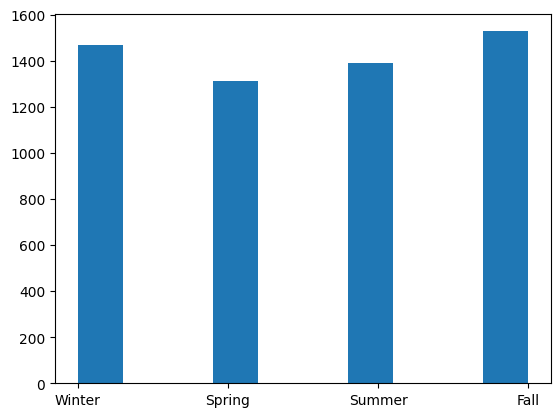

In [74]:
plt.hist(Seasonal_ROI['Season'])

(array([1.000e+00, 1.300e+01, 5.450e+02, 4.695e+03, 3.350e+02, 7.000e+01,
        2.800e+01, 7.000e+00, 3.000e+00, 1.000e+00]),
 array([-3.07237650e+08, -2.13447662e+08, -1.19657675e+08, -2.58676875e+07,
         6.79223000e+07,  1.61712288e+08,  2.55502275e+08,  3.49292262e+08,
         4.43082250e+08,  5.36872238e+08,  6.30662225e+08]),
 <BarContainer object of 10 artists>)

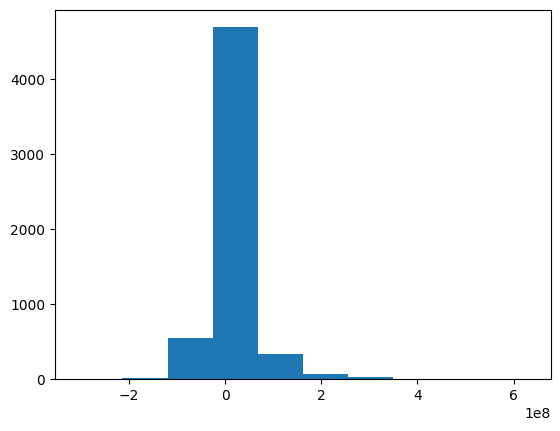

In [75]:
plt.hist(Seasonal_ROI['ROI'])

In [76]:
Seasonal_ROI.head()

,Season,ROI,profitability
0,Winter,335507625,Profit Made
1,Spring,-169536125,Investment Loss
4,Summer,-307237650,Investment Loss
7,Spring,128405868,Profit Made
10,Winter,303181382,Profit Made


In [77]:
Seasonal_ROI.profitability.value_counts()

profitability
Investment Loss       2531
Investment Doubled    1995
Profit Made           1172
Name: count, dtype: int64

In [78]:
season_counts = Seasonal_ROI.groupby('Season')['profitability'].value_counts().unstack(fill_value=0)

print(season_counts)


profitability  Investment Doubled  Investment Loss  Profit Made
Season                                                         
Fall                          470              742          316
Spring                        408              621          282
Summer                        486              584          320
Winter                        631              584          254


In [79]:
season_counts=season_counts.reset_index()

In [80]:
#season_counts['movie_count']=season_counts['Investment Doubled']+ season_counts['Investment Loss']+ season_counts['Profit Made']

In [81]:
seasonal_profits=season_counts

In [82]:
seasonal_profits.head()

profitability,Season,Investment Doubled,Investment Loss,Profit Made
0,Fall,470,742,316
1,Spring,408,621,282
2,Summer,486,584,320
3,Winter,631,584,254


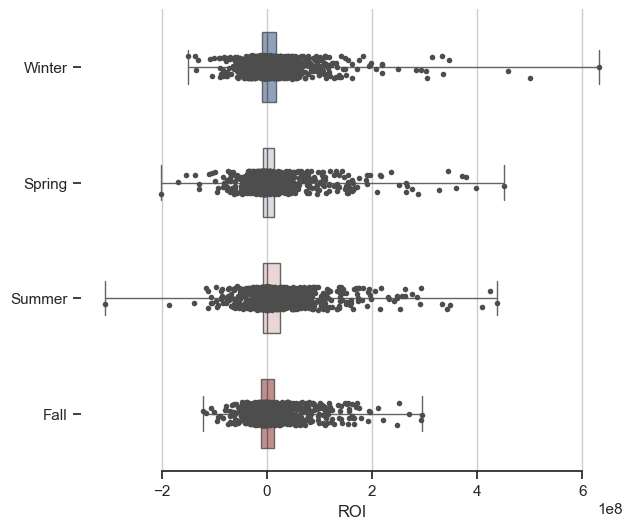

In [83]:


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
seasons = Seasonal_ROI

# Plot the orbital period with horizontal boxes
sns.boxplot(
    seasons, x="ROI", y="Season", hue="Season",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(Seasonal_ROI, x="ROI", y="Season", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [84]:
Genre_ROI.head()

,genres,ROI,profitability
0,Horror,335507625,Profit Made
1,Action,-169536125,Investment Loss
2,Adventure,-169536125,Investment Loss
3,Fantasy,-169536125,Investment Loss
4,Action,-307237650,Investment Loss


In [85]:
Genre_ROI['genres'].value_counts()

genres
Drama          1307
Comedy          776
Action          653
Thriller        506
Adventure       480
Horror          379
Crime           373
Documentary     362
Romance         334
Mystery         236
Biography       235
Sci-Fi          223
Family          188
Fantasy         185
Animation       141
History          89
Music            86
Sport            71
War              51
Musical          31
Western          25
News              7
Reality-TV        1
Name: count, dtype: int64

In [86]:
genre_counts = Genre_ROI.groupby('genres')['profitability'].value_counts().unstack(fill_value=0)
genre_counts= genre_counts.sort_values(by=['Investment Doubled'], ascending=[False])
#genre_counts['movie_count']=genre_counts['Investment Doubled']+ genre_counts['Investment Loss']+ genre_counts['Profit Made']
genre_counts= genre_counts.reset_index()

genre_counts.head()

profitability,genres,Investment Doubled,Investment Loss,Profit Made
0,Drama,470,619,218
1,Comedy,292,308,176
2,Horror,205,131,43
3,Thriller,195,230,81
4,Action,173,334,146


In [87]:
top_10_genre_counts= genre_counts.head(10)
top_10_genre_counts

profitability,genres,Investment Doubled,Investment Loss,Profit Made
0,Drama,470,619,218
1,Comedy,292,308,176
2,Horror,205,131,43
3,Thriller,195,230,81
4,Action,173,334,146
5,Romance,135,138,61
6,Documentary,129,181,52
7,Adventure,128,218,134
8,Crime,114,185,74
9,Mystery,108,94,34


In [88]:
genre_counts= Genre_ROI['genres'].value_counts().to_frame().reset_index()
top_10_genres= genre_counts['genres'][:10].to_list()
top_10_genres

['Drama',
 'Comedy',
 'Action',
 'Thriller',
 'Adventure',
 'Horror',
 'Crime',
 'Documentary',
 'Romance',
 'Mystery']

In [89]:
len(Genre_ROI)

6739

In [90]:
top_10_Genre_ROI=Genre_ROI[Genre_ROI['genres'].isin(top_10_genres)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Horror'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Thriller'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Romance'),
  Text(9, 0, 'Mystery')])

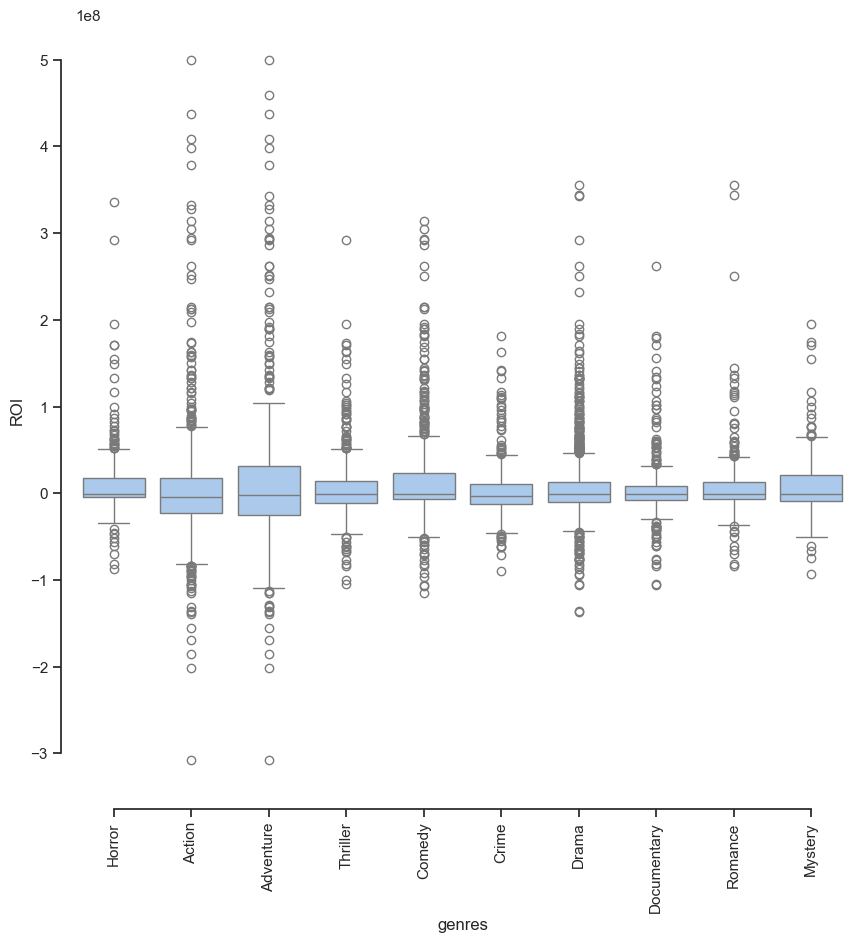

In [91]:

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
plt.figure(figsize=(10, 10))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="genres", y="ROI", 
            #hue="smoker", palette=["m", "g"],
            data=top_10_Genre_ROI)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=90)

In [92]:
Genre_ROI.groupby('genres')['ROI'].mean().sort_values()

genres
News          -1.864393e+07
Western       -6.213031e+06
Reality-TV    -1.000000e+06
War           -4.350968e+05
History       -2.492056e+05
Crime          3.283603e+06
Documentary    4.804843e+06
Action         5.354485e+06
Fantasy        5.543607e+06
Thriller       5.918267e+06
Drama          6.380701e+06
Biography      8.309352e+06
Romance        8.593444e+06
Mystery        8.971032e+06
Sport          9.652116e+06
Horror         9.817021e+06
Comedy         1.399452e+07
Music          1.492638e+07
Adventure      1.501529e+07
Family         1.681673e+07
Sci-Fi         1.913102e+07
Animation      3.206159e+07
Musical        3.938993e+07
Name: ROI, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Horror'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Fantasy'),
  Text(4, 0, 'Sci-Fi'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Western'),
  Text(7, 0, 'Animation'),
  Text(8, 0, 'Comedy'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Crime'),
  Text(11, 0, 'Drama'),
  Text(12, 0, 'History'),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'Musical'),
  Text(15, 0, 'Romance'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'Biography'),
  Text(18, 0, 'Sport'),
  Text(19, 0, 'War'),
  Text(20, 0, 'News'),
  Text(21, 0, 'Music'),
  Text(22, 0, 'Reality-TV')])

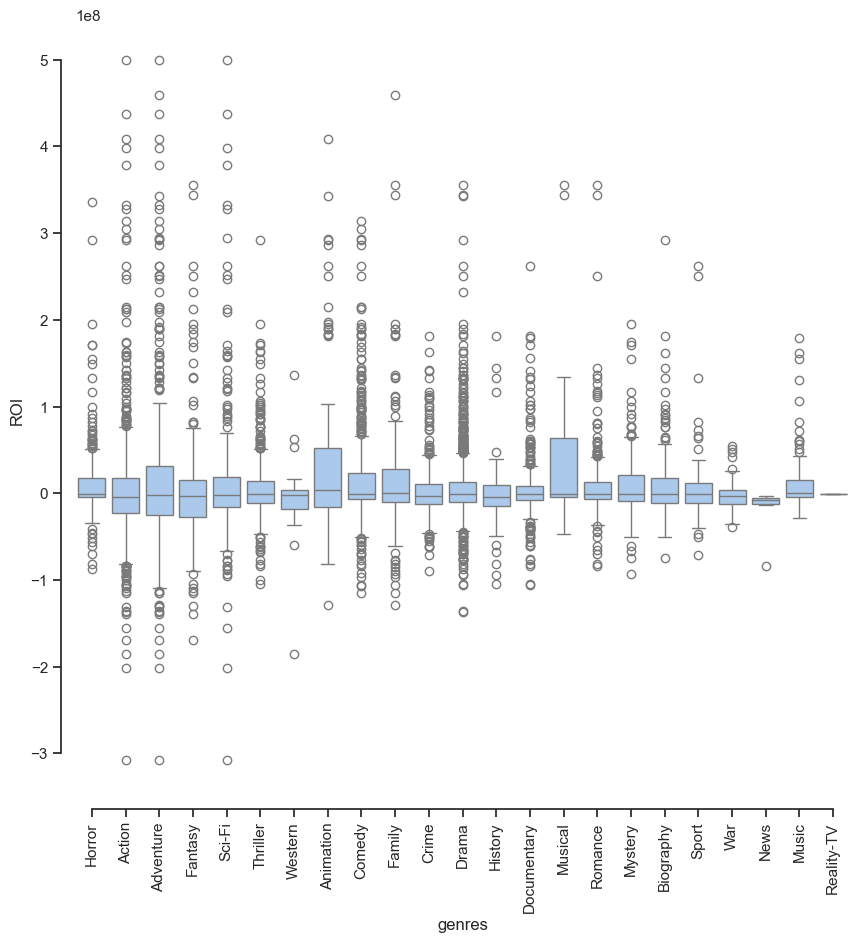

In [93]:

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
plt.figure(figsize=(10, 10))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="genres", y="ROI", 
            #hue="smoker", palette=["m", "g"],
            data=Genre_ROI)
sns.despine(offset=10, trim=True)

plt.xticks(rotation=90)

(array([3.000e+00, 1.200e+01, 2.050e+02, 4.746e+03, 1.409e+03, 2.190e+02,
        7.500e+01, 4.000e+01, 2.200e+01, 8.000e+00]),
 array([-3.07237650e+08, -2.26507928e+08, -1.45778207e+08, -6.50484852e+07,
         1.56812364e+07,  9.64109580e+07,  1.77140680e+08,  2.57870401e+08,
         3.38600123e+08,  4.19329844e+08,  5.00059566e+08]),
 <BarContainer object of 10 artists>)

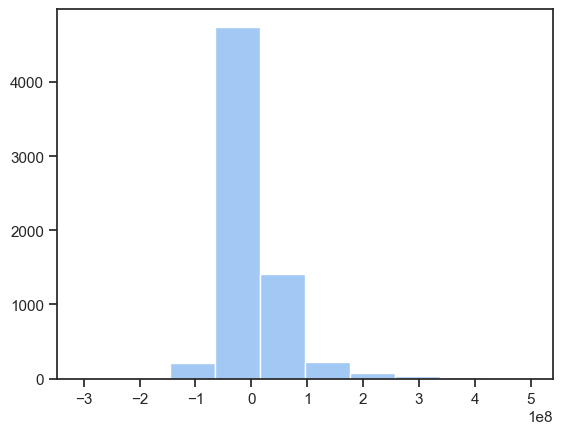

In [94]:
plt.hist(Genre_ROI['ROI'])

In [95]:
Budget_ROI.head()

,production_budget,ROI,profitability
0,425000000,335507625,Profit Made
1,410600000,-169536125,Investment Loss
4,350000000,-307237650,Investment Loss
7,330600000,128405868,Profit Made
10,317000000,303181382,Profit Made


In [96]:
#low budget = 5,000,000 and under
#mid level budget = between 5,000,000 and 50,000,000
#high end budget= over 50,000,000

In [97]:
def budget_leveler(budget):
    if 0 < budget < 5000000:
        x='Low Budget'
    elif 5000000 < budget < 50000000:
        x='Mid Level Budget'
    else:
        x='High End Budget'
    return x

In [98]:
Budget_ROI['level']= Budget_ROI['production_budget'].apply(lambda x: budget_leveler(x))
Budget_ROI.head()

,production_budget,ROI,profitability,level
0,425000000,335507625,Profit Made,High End Budget
1,410600000,-169536125,Investment Loss,High End Budget
4,350000000,-307237650,Investment Loss,High End Budget
7,330600000,128405868,Profit Made,High End Budget
10,317000000,303181382,Profit Made,High End Budget


In [99]:
budget_counts = Budget_ROI.groupby('level')['profitability'].value_counts().unstack(fill_value=0)
budget_counts= budget_counts.reset_index()
#budget_counts['movie_count']=budget_counts['Investment Doubled']+ budget_counts['Investment Loss']+ budget_counts['Profit Made']
print(budget_counts)


profitability             level  Investment Doubled  Investment Loss  \
0               High End Budget                 268              673   
1                    Low Budget                 751              490   
2              Mid Level Budget                 976             1368   

profitability  Profit Made  
0                      410  
1                      106  
2                      656  


In [100]:
budget_counts.head()

profitability,level,Investment Doubled,Investment Loss,Profit Made
0,High End Budget,268,673,410
1,Low Budget,751,490,106
2,Mid Level Budget,976,1368,656


In [101]:
Budget_ROI['level'].value_counts()

level
Mid Level Budget    3000
High End Budget     1351
Low Budget          1347
Name: count, dtype: int64

In [102]:
#most definitely going to have to bin these

Budget_ROI['production_budget'].value_counts()

production_budget
20000000    226
10000000    209
30000000    175
15000000    171
40000000    170
           ... 
14400000      1
14600000      1
15250000      1
15300000      1
1100          1
Name: count, Length: 500, dtype: int64

In [103]:
Budget_ROI['production_budget'].describe()

count    5.698000e+03
mean     3.181423e+07
std      4.197735e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

(array([4.366e+03, 8.480e+02, 2.280e+02, 1.440e+02, 7.700e+01, 1.900e+01,
        6.000e+00, 7.000e+00, 1.000e+00, 2.000e+00]),
 array([1.1000000e+03, 4.2500990e+07, 8.5000880e+07, 1.2750077e+08,
        1.7000066e+08, 2.1250055e+08, 2.5500044e+08, 2.9750033e+08,
        3.4000022e+08, 3.8250011e+08, 4.2500000e+08]),
 <BarContainer object of 10 artists>)

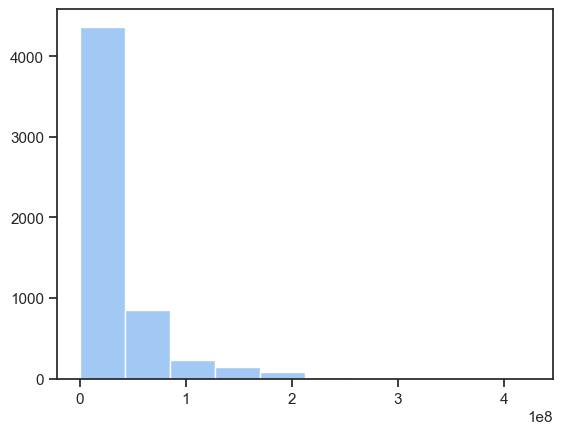

In [104]:
plt.hist(Budget_ROI['production_budget'])

(array([1.000e+00, 1.300e+01, 5.450e+02, 4.695e+03, 3.350e+02, 7.000e+01,
        2.800e+01, 7.000e+00, 3.000e+00, 1.000e+00]),
 array([-3.07237650e+08, -2.13447662e+08, -1.19657675e+08, -2.58676875e+07,
         6.79223000e+07,  1.61712288e+08,  2.55502275e+08,  3.49292262e+08,
         4.43082250e+08,  5.36872238e+08,  6.30662225e+08]),
 <BarContainer object of 10 artists>)

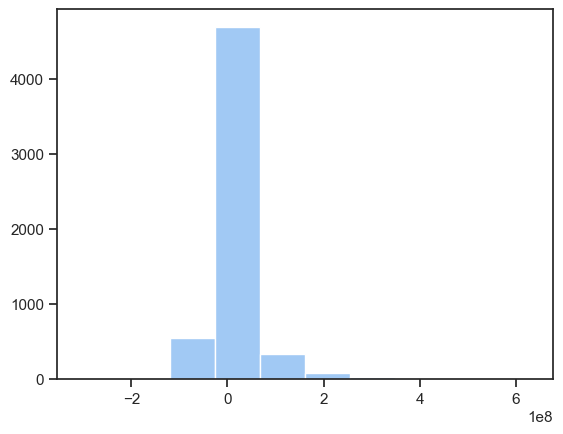

In [105]:
plt.hist(Budget_ROI['ROI'])

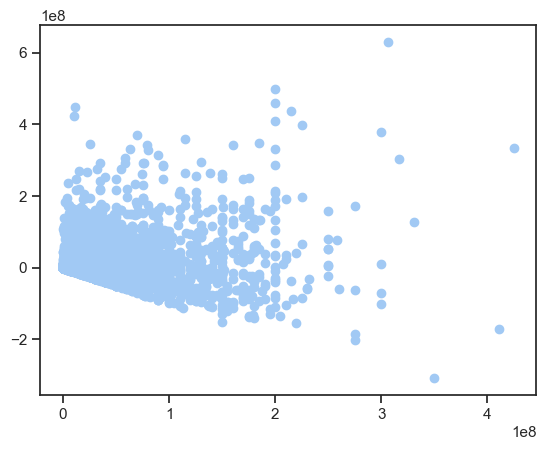

In [106]:
plt.scatter(Budget_ROI['production_budget'], Budget_ROI['ROI'])

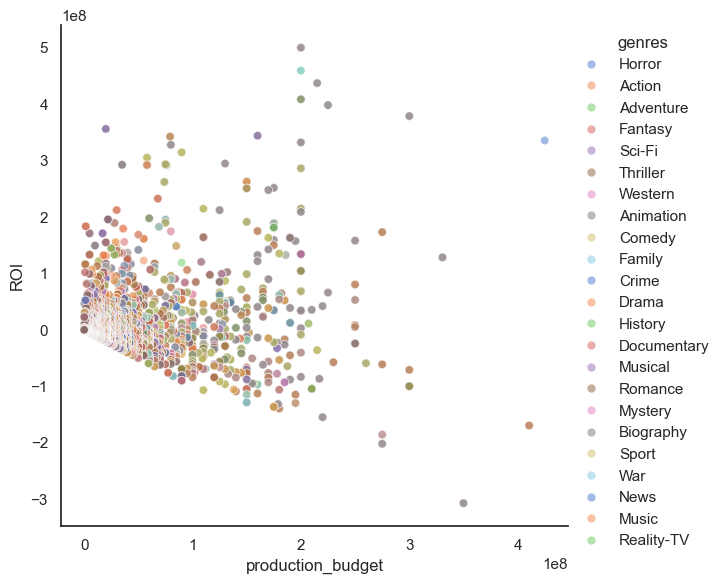

In [107]:

sns.set_theme(style="white")

# Load the example mpg dataset

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x='production_budget', y='ROI', hue='genres',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=movies_df)

In [108]:
movie_genre_analysis['movie'].value_counts()

movie
Home                            39
The Gift                        18
The Island                      14
Life                            14
Crossroads                      14
                                ..
The Strangers: Prey at Night     1
Dinner for Schmucks              1
Ted 2                            1
Entrapment                       1
Avatar                           1
Name: count, Length: 2299, dtype: int64

In [109]:
budget_analysis['movie'].value_counts()

movie
Avatar                1
Ultramarines          1
Glitter               1
Bright Star           1
Club Dread            1
                     ..
The Age of Adaline    1
Glory Road            1
John Wick             1
Pokemon 2000          1
My Date With Drew     1
Name: count, Length: 5698, dtype: int64

# graph the new datasets

In [110]:
#seasonal_profits
#top_10_genre_counts
#budget_counts

In [111]:
budget_counts

profitability,level,Investment Doubled,Investment Loss,Profit Made
0,High End Budget,268,673,410
1,Low Budget,751,490,106
2,Mid Level Budget,976,1368,656


In [167]:
budget_counts2 = budget_counts[[budget_counts.columns[0], budget_counts.columns[2], budget_counts.columns[3], budget_counts.columns[1]]]
budget_counts2 = pd.concat([budget_counts2.iloc[1:], budget_counts2.iloc[:1]], ignore_index=True)
budget_counts2= budget_counts2.set_index('level')
budget_counts2['Profit Made']= budget_counts2['Profit Made']+ budget_counts2['Investment Doubled']
budget_counts2= budget_counts2.reset_index()
budget_counts2.head()

profitability,level,Investment Loss,Profit Made,Investment Doubled
0,Low Budget,490,857,751
1,Mid Level Budget,1368,1632,976
2,High End Budget,673,678,268


<Axes: xlabel='level'>

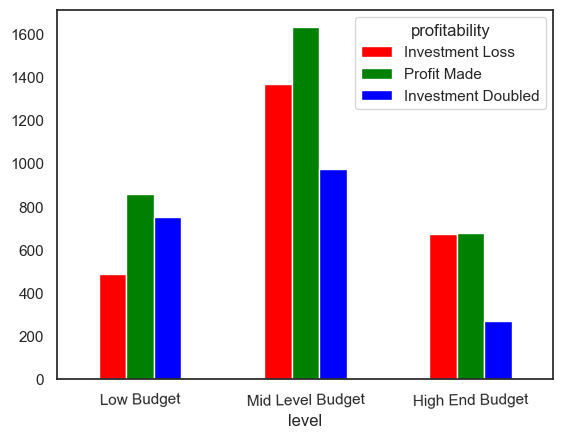

In [144]:
budget_counts2.plot.bar(rot=1, 
                        color={"Investment Loss": "red", "Profit Made": "green", "Investment Doubled": 'blue'}
                       )
                

In [229]:
budget_counts2['level']

0          Low Budget
1    Mid Level Budget
2     High End Budget
Name: level, dtype: object

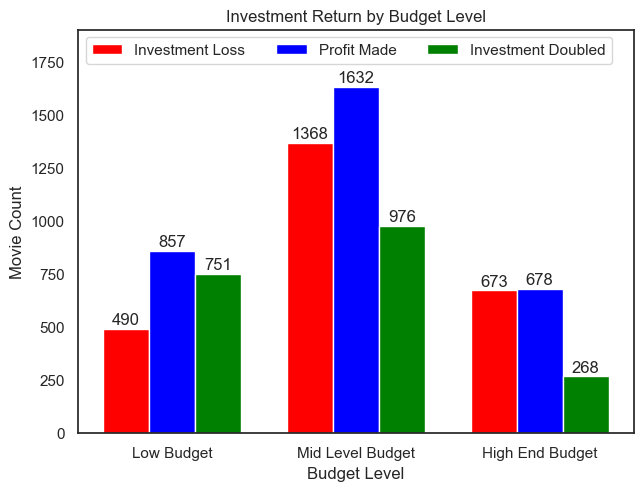

In [232]:
budgets = budget_counts2['level']
losses= budget_counts2['Investment Loss'].to_list()
profits= budget_counts2['Profit Made'].to_list()
doubles= budget_counts2['Investment Doubled'].to_list()

budget_counts = {
    'Investment Loss': losses,
    'Profit Made': profits,
    'Investment Doubled': doubles
    }

x = np.arange(len(budgets))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(layout='constrained')

for (attribute, measurement), color in zip(budget_counts.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color= color)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Movie Count')
ax.set_xlabel('Budget Level')
ax.set_title('Investment Return by Budget Level')
ax.set_xticks(x + width, budgets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1900)

plt.show()

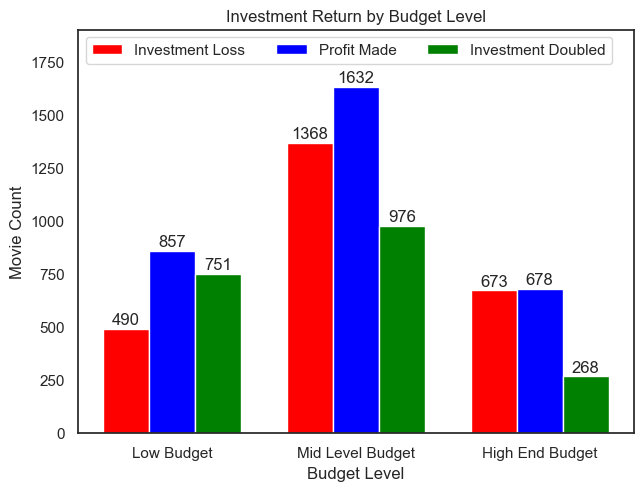

In [230]:
budgets = budget_counts2['level']
budget_counts = {
    'Investment Loss': (490, 1368, 673),
    'Profit Made': (857, 1632, 678),
    'Investment Doubled': (751, 976, 268)
    }

x = np.arange(len(budgets))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(layout='constrained')

for (attribute, measurement), color in zip(budget_counts.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color= color)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Movie Count')
ax.set_xlabel('Budget Level')
ax.set_title('Investment Return by Budget Level')
ax.set_xticks(x + width, budgets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1900)

plt.show()

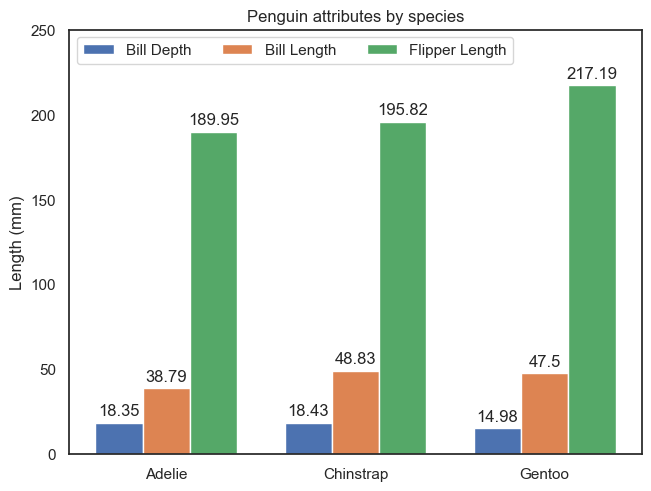

In [177]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [244]:
top_10_genre_counts.head()

profitability,genres,Investment Doubled,Investment Loss,Profit Made
0,Drama,470,619,218
1,Comedy,292,308,176
2,Horror,205,131,43
3,Thriller,195,230,81
4,Action,173,334,146


In [118]:
top_10_genre_counts2= top_10_genre_counts.set_index('genres')
top_10_genre_counts2.head()

profitability,Investment Doubled,Investment Loss,Profit Made
genres,,,
Drama,470,619,218
Comedy,292,308,176
Horror,205,131,43
Thriller,195,230,81
Action,173,334,146


In [245]:
top_10_genre_counts2 = top_10_genre_counts2[[top_10_genre_counts2.columns[1], top_10_genre_counts2.columns[2], top_10_genre_counts2.columns[0]]]
top_10_genre_counts2['Profit Made']= top_10_genre_counts2['Profit Made']+ top_10_genre_counts2['Investment Doubled']
top_10_genre_counts2= top_10_genre_counts2.reset_index()
top_10_genre_counts2.head()

profitability,genres,Profit Made,Investment Doubled,Investment Loss
0,Drama,1158,470,619
1,Comedy,760,292,308
2,Horror,453,205,131
3,Thriller,471,195,230
4,Action,492,173,334


<Axes: ylabel='genres'>

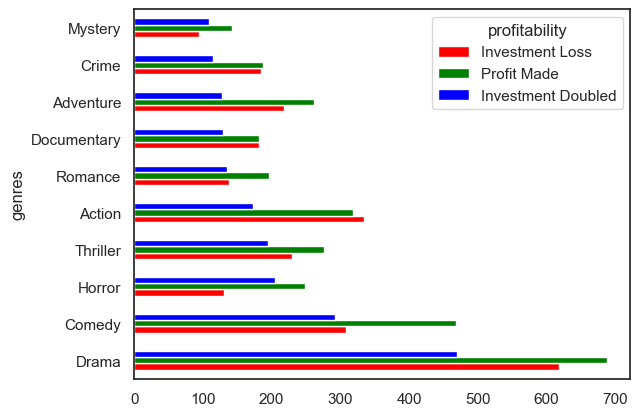

In [141]:
top_10_genre_counts2.plot.barh(
    color={"Investment Loss": "red", "Profit Made": "green", "Investment Doubled": 'blue'}
    )

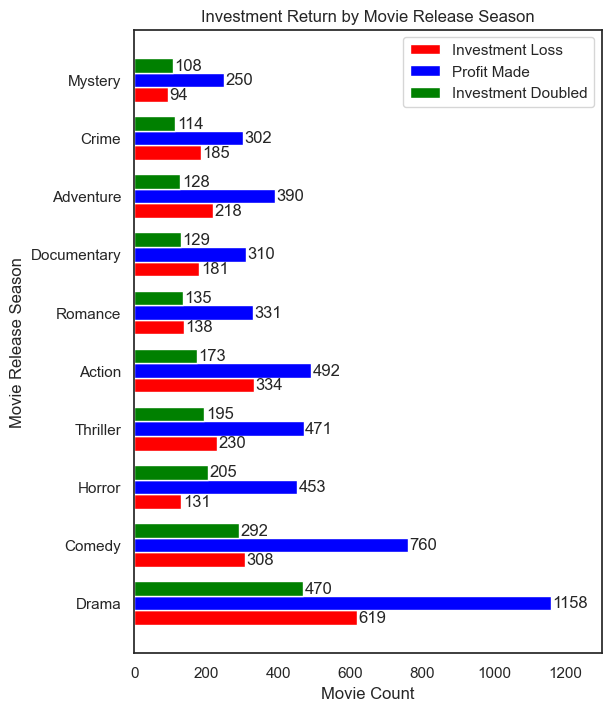

In [259]:
genres = top_10_genre_counts2['genres']
losses = top_10_genre_counts2['Investment Loss'].to_list()
profits = top_10_genre_counts2['Profit Made'].to_list()
doubles = top_10_genre_counts2['Investment Doubled'].to_list()

genre_counts = {
    'Investment Loss': losses,
    'Profit Made': profits,
    'Investment Doubled': doubles
}

y = np.arange(len(genres))  # the label locations
height = 0.25  # Height of each horizontal bar
multiplier = 0  # Used to shift the bars for each category

colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(layout='constrained', figsize=(6,7))

for (attribute, measurement), color in zip(genre_counts.items(), colors):
    offset = height * multiplier  # Shift the bars down for each category
    rects = ax.barh(y+ offset, measurement, height, label=attribute, color=color)  # Create horizontal bars
    ax.bar_label(rects, padding=1)  # Add value labels on the bars
    multiplier += 1  # Increment multiplier to shift the next set of bars further down

ax.set_xlabel('Movie Count')  # Now this is the x-axis (values of the bars)
ax.set_ylabel('Movie Release Season')  # Now this is the y-axis (budget categories)
ax.set_title('Investment Return by Movie Release Season')
ax.set_yticks(y+ height, genres)

ax.legend(loc='upper right', ncols=1)

ax.set_xlim(0, 1300)

plt.show()


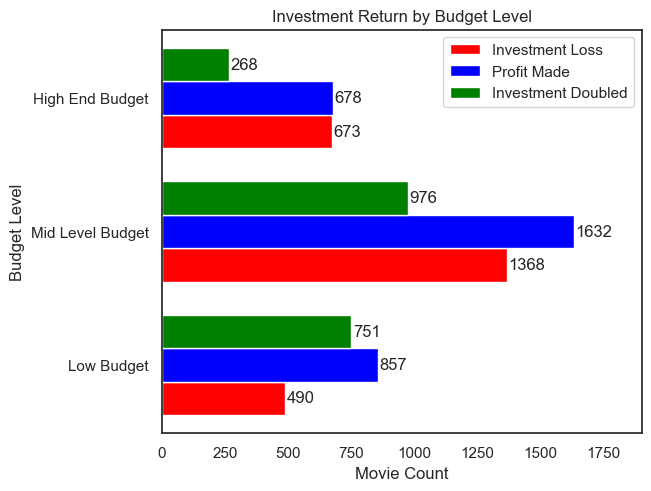

In [244]:
budgets = budget_counts2['level']
losses = budget_counts2['Investment Loss'].to_list()
profits = budget_counts2['Profit Made'].to_list()
doubles = budget_counts2['Investment Doubled'].to_list()

budget_counts = {
    'Investment Loss': losses,
    'Profit Made': profits,
    'Investment Doubled': doubles
}

y = np.arange(len(budgets))  # the label locations
height = 0.25  # Height of each horizontal bar
multiplier = 0  # Used to shift the bars for each category

colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(layout='constrained')

for (attribute, measurement), color in zip(budget_counts.items(), colors):
    offset = height * multiplier  # Shift the bars down for each category
    rects = ax.barh(y+ offset, measurement, height, label=attribute, color=color)  # Create horizontal bars
    ax.bar_label(rects, padding=1)  # Add value labels on the bars
    multiplier += 1  # Increment multiplier to shift the next set of bars further down

ax.set_xlabel('Movie Count')  # Now this is the x-axis (values of the bars)
ax.set_ylabel('Budget Level')  # Now this is the y-axis (budget categories)
ax.set_title('Investment Return by Budget Level')
ax.set_yticks(y+ height, budgets)

ax.legend(loc='upper right', ncols=1)

ax.set_xlim(0, 1900)

plt.show()


In [247]:
seasonal_profits

profitability,Season,Investment Doubled,Investment Loss,Profit Made,movie_count
0,Fall,470,742,316,1528
1,Spring,408,621,282,1311
2,Summer,486,584,320,1390
3,Winter,631,584,254,1469


In [128]:
seasonal_profits2= seasonal_profits.set_index('Season')
seasonal_profits2.head()

profitability,Investment Doubled,Investment Loss,Profit Made
Season,,,
Fall,470,742,316
Spring,408,621,282
Summer,486,584,320
Winter,631,584,254


In [195]:
seasonal_profits2 = seasonal_profits[[seasonal_profits.columns[0], seasonal_profits.columns[2], seasonal_profits.columns[3], seasonal_profits.columns[1]]]
seasonal_profits2 = pd.concat([seasonal_profits2.iloc[1:2], seasonal_profits2.iloc[2:3], seasonal_profits2.iloc[:1], seasonal_profits2.iloc[3:]], ignore_index=True)
seasonal_profits2['Profit Made']= seasonal_profits2['Profit Made']+ seasonal_profits2['Investment Doubled']
#seasonal_profits2= seasonal_profits2.set_index('Season')
seasonal_profits2.head()

profitability,Season,Investment Loss,Profit Made,Investment Doubled
0,Spring,621,690,408
1,Summer,584,806,486
2,Fall,742,786,470
3,Winter,584,885,631


<Axes: xlabel='Season'>

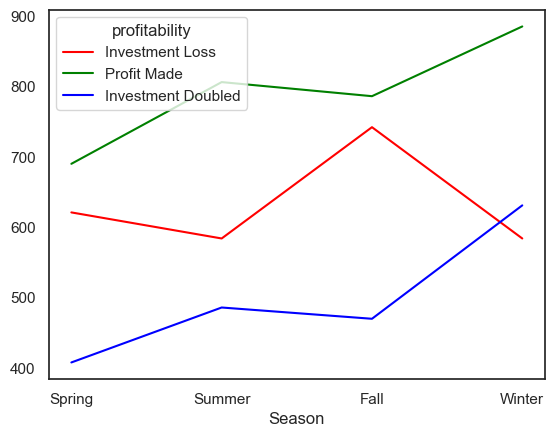

In [140]:
seasonal_profits2.plot(
    color={"Investment Loss": "red", "Profit Made": "green", "Investment Doubled": 'blue'}
    )

In [198]:
seasonal_profits2['Season'].tolist()

['Spring', 'Summer', 'Fall', 'Winter']

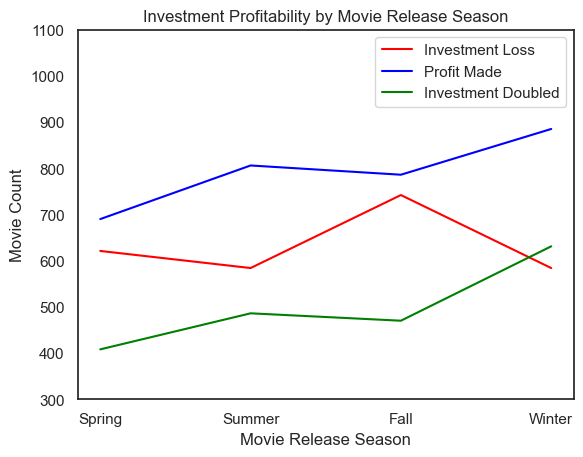

In [210]:
loss = seasonal_profits2['Investment Loss']
profit = seasonal_profits2['Profit Made']
doubled = seasonal_profits2['Investment Doubled']
Season = seasonal_profits2['Season'].tolist()

fig, ax = plt.subplots()
ax.plot(Season, loss, label= "Investment Loss", color= 'red')
ax.plot(Season, profit, label= "Profit Made", color= 'blue')
ax.plot(Season, doubled, label= "Investment Doubled", color= 'green')
ax.legend()
ax.set_ylim(300,1100)
ax.set_ylabel('Movie Count')
ax.set_xlabel('Movie Release Season')
ax.set_title('Investment Profitability by Movie Release Season')


plt.show()

<Axes: xlabel='Season'>

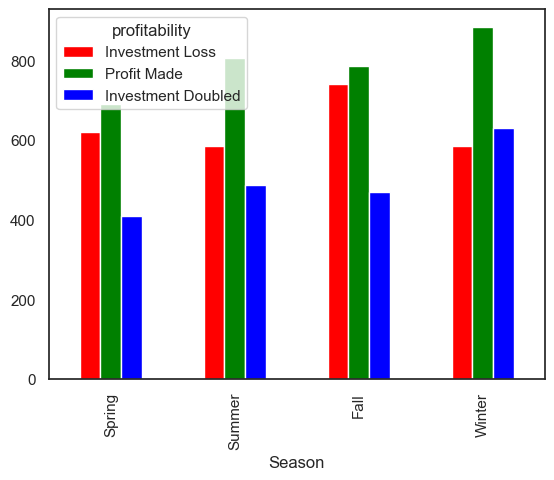

In [136]:
seasonal_profits2.plot.bar(
    color={"Investment Loss": "red", "Profit Made": "green", "Investment Doubled": 'blue'}
    )